# MMSB textbook figures

In [1]:
# Packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

In [2]:
# convenience function

def _ts(tend, num=100):
    return np.linspace(0.0, tend, num=num)

def _mm(x, k=1):
    return x / (x + k)

def _mmr(x, k=1):
    return _mm(k, x)

def _hill(x, k, n):
    return _mm(x**n, k**n)

def _hillr(x, k, n):
    return _mmr(x**n, k**n)

# Fig 1.7

[Collins toggle switch](https://www.nature.com/articles/35002131)

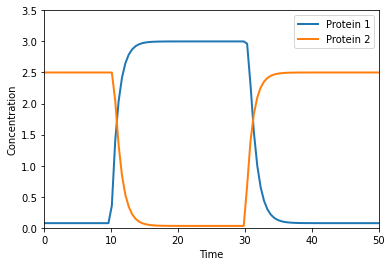

In [3]:
"""
model of Collins toggle switch
from Gardiner et al. (2000) Nature 403, pp. 339-342
Figures 1.7, 7.13, 7.14, 7.15
"""
# Model
def collin_toggle_switch(y, t, a1, a2, beta, gamma):
    p1, p2 = y
    i1 = 10 if 30 < t < 40 else 0
    i2 = 10 if 10 < t < 20 else 0
    """Collins toggle switch function"""
    dp1 = a1 * _hillr(p2, 1 + i2, beta) - p1
    dp2 = a2 * _hillr(p1, 1 + i1, gamma) - p2
    return [dp1, dp2]

# Initial conditions and parameters
ts = _ts(50.0)
y0 = [0.075, 2.5]
p = a1, a2, beta, gamma = 3, 2.5, 4, 4
sol = odeint(collin_toggle_switch, y0, ts, args=p)

# Plot the results
plt.figure()
plt.plot(ts, sol[:, 0], linewidth=2, label="Protein 1")
plt.plot(ts, sol[:, 1], linewidth=2, label="Protein 2")
plt.axis([ts[0], ts[-1], 0, 3.5])
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend(loc='best')

# Figure 1.9

[Hodgkin-Huxley](https://en.wikipedia.org/wiki/Hodgkin%E2%80%93Huxley_model) electrophysiology model

Text(0, 0.5, 'Membrane voltage (mV)')

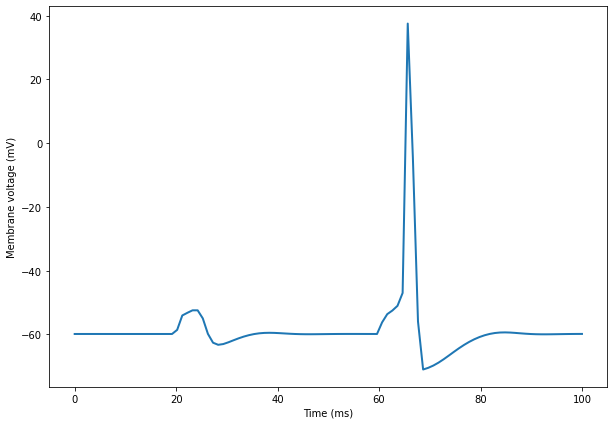

In [4]:
"""
Hodgkin-Huxley model of excitable barnacle muscle fiber
reviewed in Rinzel (1990) Bulletin of Mathematical Biology 52 pp. 5-23.
Figure 1.9 and problem 8.6.4
"""
from numpy import exp
from scipy.special import exprel

def _istim(t):
    if 20 < t <= 21:
        return -6.80
    elif 60 < t <= 61:
        return -6.90
    else:
        return 0
    
def hh_sys(v, m, h, n):
    "ODE system of Hodgkin-Huxley model"
    mAlfaV = -0.10 * (v + 35)
    mAlfa = 1 / exprel(mAlfaV)
    mBeta = 4.0 * exp(-(v + 60) / 18.0)
    dmdt = -(mAlfa + mBeta) * m + mAlfa
    
    hAlfa = 0.07 * exp(-(v+60)/20)
    hBeta = 1 / (exp(-(v+30)/10) + 1)
    dhdt  = -(hAlfa + hBeta) * h + hAlfa
    
    nAlfaV = -0.1 * (v+50)
    nAlfa = 0.1 / exprel(nAlfaV)
    nBeta = 0.125 * exp( -(v+60) / 80)
    dndt  = -(nAlfa + nBeta) * n + nAlfa
    
    return (dmdt, dhdt, dndt)

    
def hh_currents(v, m, h, n,
    E_N = 55,  # Reversal potential of Na
    E_K = -72,  # Reversal potential of K
    E_LEAK = -49.0,  # Reversal potential of leaky channels
    G_N_BAR = 120.0,  # Max. Na channel conductance
    G_K_BAR = 36.0,  # Max. K channel conductance
    G_LEAK = 0.30):  # Max. leak channel conductance
    "Hodgkin-Huxley channel currents"
    
    iNa = G_N_BAR * (v - E_N) * (m**3) * h
    iK = G_K_BAR * (v - E_K) * (n**4)
    iLeak = G_LEAK * (v - E_LEAK)
                
    return (iNa, iK, iLeak)
          

def hh_rhs(y, t,
    E_N = 55,  # Reversal potential of Na
    E_K = -72,  # Reversal potential of K
    E_LEAK = -49.0,  # Reversal potential of leaky channels
    G_N_BAR = 120.0,  # Max. Na channel conductance
    G_K_BAR = 36.0,  # Max. K channel conductance
    G_LEAK = 0.30,  # Max. leak channel conductance
    C_M = 1.0  # membrane capacitance iStim
    ):

    # Differential equations quations
    v, m, h, n = y
                
    (dmdt, dhdt, dndt) = hh_sys(v, m, h, n)
    (iNa, iK, iLeak) = hh_currents(v, m, h, n,
                                   E_N = E_N,  
                                   E_K = E_K,  
                                   E_LEAK = E_LEAK,
                                   G_N_BAR = G_N_BAR,  
                                   G_K_BAR = G_K_BAR,
                                   G_LEAK = G_LEAK)
    
    dVdt = -(iNa + iK + iLeak + _istim(t)) / C_M
    return [dVdt, dmdt, dhdt, dndt]


# Initial conditions
y0 = v, m, h, n = -59.8977, 0.0536, 0.5925, 0.3192
ts = _ts(100)
sol = odeint(hh_rhs, y0, ts)
plt.figure(figsize=(10, 7))
plt.plot(ts, sol[:, 0], linewidth=2)
plt.xlabel("Time (ms)")
plt.ylabel("Membrane voltage (mV)")

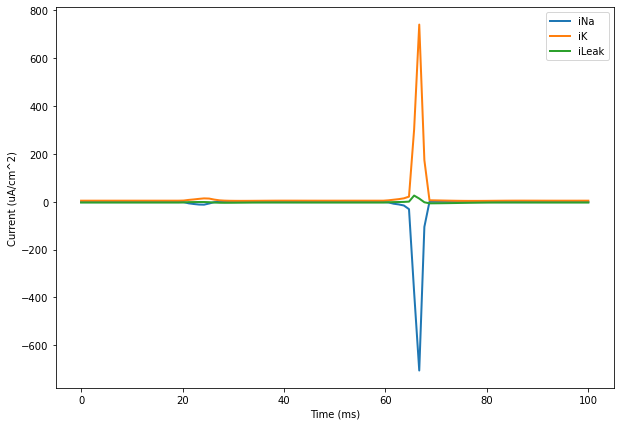

In [5]:
(iNa, iK, iLeak) = hh_currents(sol[:, 0], sol[:, 1], sol[:, 2], sol[:, 3])

plt.figure(figsize=(10, 7))
plt.plot(ts, iNa, linewidth=2, label="iNa")
plt.plot(ts, iK, linewidth=2, label="iK")
plt.plot(ts, iLeak, linewidth=2, label="iLeak")
plt.xlabel("Time (ms)")
plt.ylabel("Current (uA/cm^2)")
plt.legend(loc="best")

Text(0, 0.5, 'Concentration (mM)')

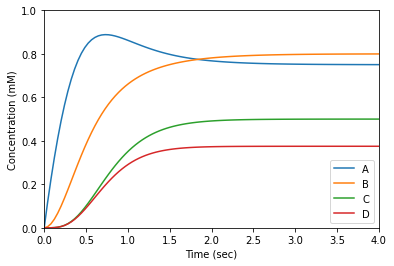

In [6]:
def rhs(y, t):
    a, b, c, d = y
    v1 = 2 * a
    v2 = 2.5 * a * b
    dA = 3 - v1 - v2
    dB = v1 - v2
    dC = v2 - 3 * c
    dD = v2 - 4 * d
    return [dA, dB, dC, dD]


ts = _ts(4.0)
y0 = [0, 0, 0, 0]
y = odeint(rhs, y0, ts)

plt.figure()
for i, leg in enumerate(('A', 'B', 'C', 'D')):
    plt.plot(ts, y[:, i], label=leg)

plt.axis([ts[0], ts[-1], 0, 1])
plt.legend(loc='best')
plt.xlabel('Time (sec)')
plt.ylabel('Concentration (mM)')

# Fig 2.11, 2.12, 2.13, 2.14

Model reduction

Text(0, 0.5, 'Concentration (arbitrary units)')

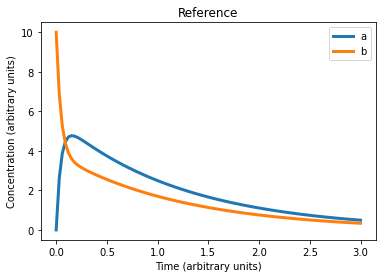

In [7]:
"""
Figure 2.11 (Fig 1) & Figure 2.12 (Fig 2) 
Simulation and rapid equilibrium approximation
As well as figure 2.13 Rapid equilibrium approximation
"""

def original_rhs(y, t, k0, k1, km1, k2):
    a, b = y
    vf = k1 * a
    vb = km1 * b
    dA = k0 - vf + vb
    dB = vf - vb - k2 * b
    return [dA, dB]

def approx_rhs(y, t, k0, k1, km1, k2):
    b = k1 / (km1 + k1) * y
    return k0 - k2 * b

def qssa_rhs(y, t, k0, k1, km1, k2):
    return k0 - k2 * y

ts = _ts(3.0)

# Figure 2.11 (Fig 1)
p = k0, k1, km1, k2 = 0, 9, 12, 2
y0 = [0, 10]
sol = odeint(original_rhs, y0, ts, args=p)
plt.figure()
plt.title('Reference')
plt.plot(ts, sol, linewidth=3)
plt.legend(('a', 'b'), loc='best')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Concentration (arbitrary units)')

Text(0, 0.5, 'Concentration (arbitrary units)')

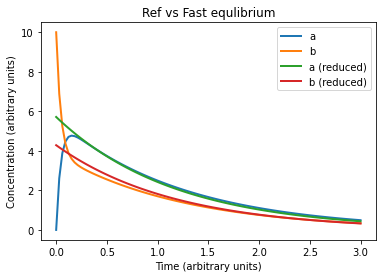

In [8]:
# Figure 2.12 (Fig 2)

y0 = [10]
sol_re = odeint(approx_rhs, y0, ts, args=p)
plt.figure()
plt.title('Ref vs Fast equlibrium')
plt.plot(ts, sol, linewidth=2)

plt.plot(ts, km1 / (km1 + k1) * sol_re, linewidth=2)
plt.plot(ts, k1 / (km1 + k1) * sol_re, linewidth=2)
plt.legend(('a', 'b', 'a (reduced)', 'b (reduced)'), loc='best')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Concentration (arbitrary units)')

Text(0, 0.5, 'Concentration (arbitrary units)')

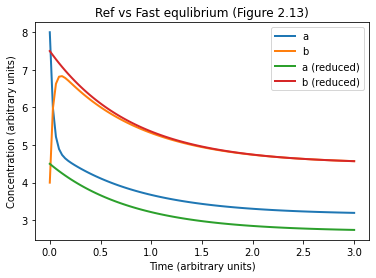

In [9]:
# Figure 2.13
p = k0, k1, km1, k2 = 9, 20, 12, 2
sol = odeint(original_rhs, [8, 4], ts, args=p)
sol_re = odeint(approx_rhs, [12], ts, args=p)
plt.figure()
plt.title('Ref vs Fast equlibrium (Figure 2.13)')
plt.plot(ts, sol, linewidth=2)
plt.plot(ts, km1 / (km1 + k1) * sol_re, linewidth=2)
plt.plot(ts, k1 / (km1 + k1) * sol_re, linewidth=2)
plt.legend(('a', 'b', 'a (reduced)', 'b (reduced)'), loc='best')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Concentration (arbitrary units)')

Text(0, 0.5, 'Concentration (arbitrary units)')

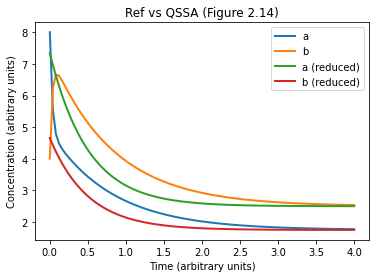

In [10]:
# Figure 2.14
ts = _ts(4.0)

p = k0, k1, km1, k2 = 5, 20, 12, 2
sol = odeint(original_rhs, [8, 4], ts, args=p)
sol_qss = odeint(qssa_rhs, [235/32], ts, args=p)

bQss = sol_qss
aQss = (k0 + km1 * bQss) / k1

plt.figure()
plt.title('Ref vs QSSA (Figure 2.14)')
plt.plot(ts, sol, linewidth=2)
plt.plot(ts, bQss, linewidth=2)
plt.plot(ts, aQss, linewidth=2)
plt.legend(('a', 'b', 'a (reduced)', 'b (reduced)'), loc='best')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Concentration (arbitrary units)')

# Problem 2.4.6

Simple kinetic model

Text(0, 0.5, 'Concentration (arbitrary units)')

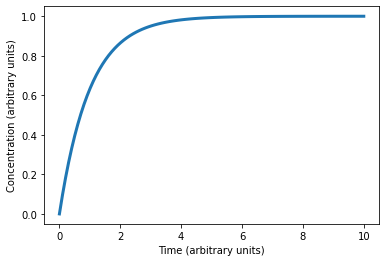

In [11]:
"""Problem 2.4.6"""
def rhs(y, t, k):
    return k - k*y

ts = _ts(10.0)
y0 = [0]

sol = odeint(rhs, y0, ts, args=(1, ))

plt.figure()
plt.plot(ts, sol, linewidth=3)
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Concentration (arbitrary units)')

# Fig 3.3

Michaelis-Menten kinetics

Text(0, 0.5, 'Concentration (arbitrary units)')

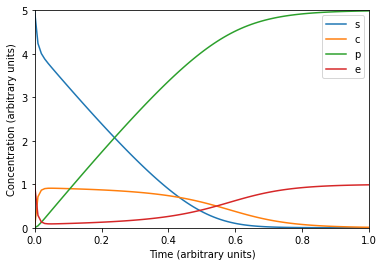

In [12]:
""" Figure 3.3 Michaelis-Menten kinetics """
def rhs_full_mm(y, t, et, k1, km1, k2):
    """
    S + E <-> ES complex -> P + E
    """
    s, es, p = y
    e = et - es
    v1 = k1 * s * e - km1 * es
    v2 = k2 * es
    return [-v1, v1 - v2, v2]

# Run full model
ts = _ts(1.0)

p = (et, k1, km1, k2) = (1, 30, 1, 10)
y0 = np.array([5, 0, 0])  # S, C, and P
sol = odeint(rhs_full_mm, y0, ts, args=p)

# Plot full model
plt.figure()
plt.plot(ts, sol)
plt.plot(ts, et-sol[:, 1])
plt.legend(('s', 'c', 'p', 'e'), loc='best')
plt.axis([ts[0], ts[-1], 0, 5])
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Concentration (arbitrary units)')

Text(0, 0.5, 'Concentration (arbitrary units)')

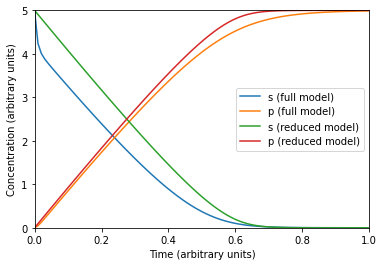

In [13]:
# Run reduced model
def rhs_reduced_mm(y, t, et, k1, km1, k2):
    """
    QSSA of the ES complex
    """
    return - k1 * k2 * et * y / (km1 + k2 + k1 * y)

y0 = [5]
sol_re = odeint(rhs_reduced_mm, y0, ts, args=p)

# Plot full and reduced model
plt.figure()
plt.plot(ts, sol[:, 0], label='s (full model)')
plt.plot(ts, sol[:, 2], label='p (full model)')
plt.plot(ts, sol_re, label='s (reduced model)')
plt.plot(ts, 5-sol_re, label='p (reduced model)')
plt.axis([0, 1, 0, 5])
plt.legend(loc='best')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Concentration (arbitrary units)')

# Fig 3.13

GMA vs MM

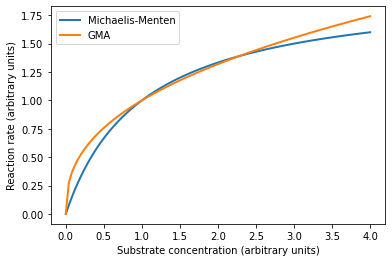

In [14]:
"""Figure 3.13: Comparions of GMA and Michaelis-Menten rate laws"""

ts = _ts(4.0)

plt.plot(ts, 2 * ts / (1 + ts), linewidth=2, label='Michaelis-Menten')
plt.plot(ts, ts**0.4, linewidth=2, label='GMA')
plt.xlabel('Substrate concentration (arbitrary units)')
plt.ylabel('Reaction rate (arbitrary units)')
plt.legend(loc='best')

# Problem 3.7.5 part (a)

Chained model

Text(0, 0.5, 'Concentration (arbitrary units)')

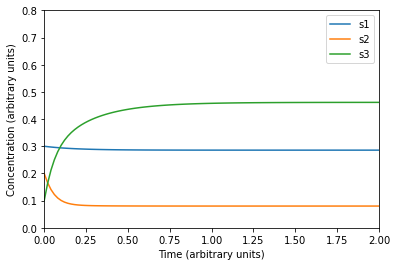

In [15]:
def model(y, t, v0, vm1, vm2, vm3, km1, km2, km3):
    s1, s2, s3 = y
    v1 = vm1 * _mm(s1, km1)
    v2 = vm2 * _mm(s2, km2)
    v3 = vm3 * _mm(s3, km3)
    return [v0-v1, v1-v2, v2-v3]


def model_reduced(y, t, v0, vm1, vm2, vm3, km1, km2, km3):
    s1, s2, s3 = y
    v1 = vm1 * s1 / km1
    v2 = vm2 * s2 / km2
    v3 = vm3 * s3 / km3
    return [v0-v1, v1-v2, v2-v3]

p = v0, vm1, vm2, vm3, km1, km2, km3 = (2, 9, 12, 15, 1, 0.4, 3)

# First set of ICs
ts = _ts(2.0)
u0 = [0.3, 0.2, 0.1]

sol1 = odeint(model, u0, ts, args=p)

plt.figure()
plt.plot(ts, sol1)
plt.legend(('s1', 's2', 's3'), loc='best')
plt.axis([ts[0], ts[-1], 0, 0.8])
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Concentration (arbitrary units)')


Text(0, 0.5, 'Concentration (arbitrary units)')

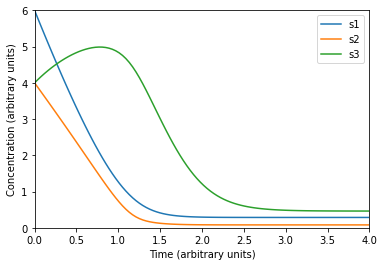

In [16]:
# Second set of ICs
u0 = [6, 4, 4.0]
ts = _ts(4.0)

sol2 = odeint(model, u0, ts, args=p)
plt.figure()
plt.plot(ts, sol2)
plt.legend(('s1', 's2', 's3'), loc='best')
plt.axis([ts[0], ts[-1], 0, 6])
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Concentration (arbitrary units)')

Text(0, 0.5, 'Concentration (arbitrary units)')

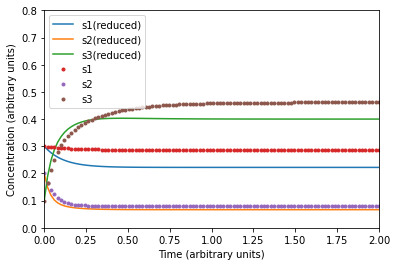

In [17]:
# Reduced model (1st IC set)
ts = _ts(2.0)

u0 = [0.3, 0.2, 0.1]

sol3 = odeint(model_reduced, u0, ts, args=p)

plt.figure()
plt.plot(ts, sol3)
plt.plot(ts, sol1, '.')
plt.legend(('s1(reduced)', 's2(reduced)', 's3(reduced)', 's1', 's2', 's3'))
plt.axis([ts[0], ts[-1], 0, 0.8])
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Concentration (arbitrary units)')

Text(0, 0.5, 'Concentration (arbitrary units)')

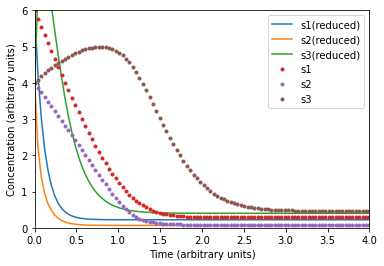

In [18]:
# Reduced model (2nd IC set)

u0 = [6, 4, 4.0]
ts = _ts(4.0)

sol4 = odeint(model_reduced, u0, ts, args=p)

plt.figure()
plt.plot(ts, sol4)
plt.plot(ts, sol2, '.')
plt.legend(('s1(reduced)', 's2(reduced)', 's3(reduced)', 's1', 's2', 's3'))
plt.axis([ts[0], ts[-1], 0, 6])
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Concentration (arbitrary units)')

# Figures 4.2, 4.3, 4.4A, 4.5, 4.18
Model of asymmetric network

Text(0, 0.5, 'Concentration')

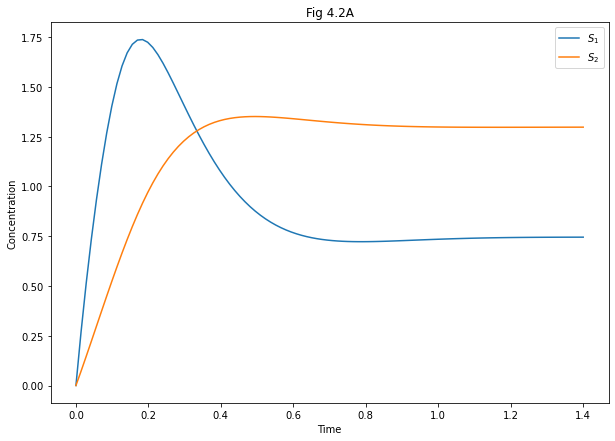

In [19]:
"""
Model of asymmetric network from Figure 4.1. 
This code generates phase plane in Figures 4.2, 4.3, 4.4A, 4.5 and
continuation diagram in Figure 4.18
"""
def rhs(y, t, k1, k2, k3, k4, k5, n):
    s1, s2 = y
    v1 = k1 / (1 + s2**n)
    v2 = k2
    v3 = k3 * s1
    v4 = k4 * s2
    v5 = k5 * s1
    return [v1 - v3 - v5, v2 + v5 - v4]

ts = _ts(1.4)

p = k1, k2, k3, k4, k5, n = 20, 5, 5, 5, 2, 4
y0s = [[0, 0], [0.5, 0.6], [0.17, 1.1], [0.25, 1.9], [1.85, 1.7]]

sols = [odeint(rhs, y0, ts, args=p) for y0 in y0s]

# Fig. 4.2A (Time series)
plt.figure(figsize=(10, 7))
plt.title("Fig 4.2A")
plt.plot(ts, sols[0])
plt.legend(('$S_1$', '$S_2$'))
plt.xlabel('Time')
plt.ylabel('Concentration')

Text(0, 0.5, 'Concentration of $S_2$')

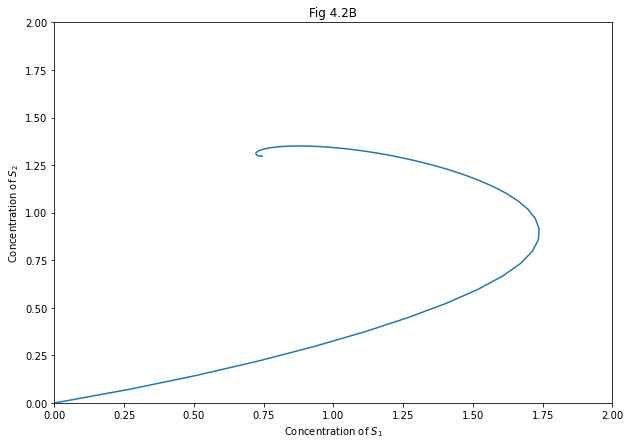

In [20]:
# Fig. 4.2B (Phase portrait)
plt.figure(figsize=(10, 7))
plt.title("Fig 4.2B")
plt.plot(sols[0][:, 0], sols[0][:, 1])
plt.axis([0, 2, 0, 2])
plt.xlabel('Concentration of $S_1$')
plt.ylabel('Concentration of $S_2$')

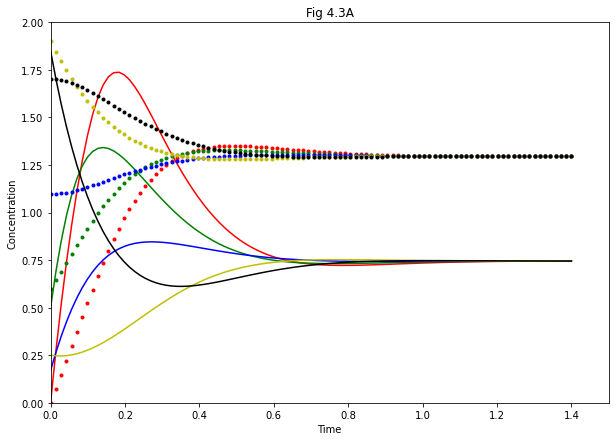

In [21]:
# Fig. 4.3A (Multiple time series)
plt.figure(figsize=(10, 7))
plt.title("Fig 4.3A")
plt.axis([0, 1.5, 0, 2])
plt.xlabel('Time')
plt.ylabel('Concentration')
for sol, color in zip(sols, 'rgbyk'):
    plt.plot(ts, sol[:, 0], color)
    plt.plot(ts, sol[:, 1], color + '.')

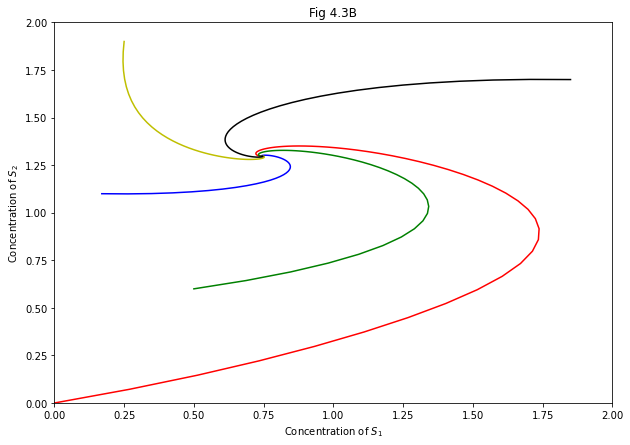

In [22]:
# Fig. 4.3B (multiple phase protraits)
plt.figure(figsize=(10, 7))
plt.axis([0, 2, 0, 2])
plt.title("Fig 4.3B")
plt.xlabel('Concentration of $S_1$')
plt.ylabel('Concentration of $S_2$')
for sol, color in zip(sols, 'rgbyk'):
    plt.plot(sol[:, 0], sol[:, 1], color)

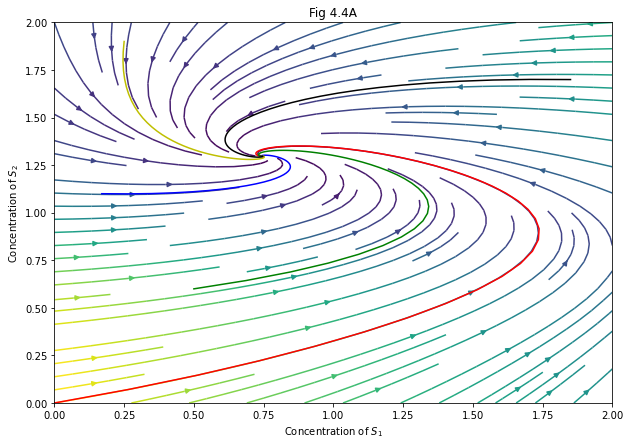

In [23]:
# Figure 4.4A (with stream plot)

plt.figure(figsize=(10, 7))
plt.axis([0, 2, 0, 2])
plt.title("Fig 4.4A")
plt.xlabel('Concentration of $S_1$')
plt.ylabel('Concentration of $S_2$')

for sol, color in zip(sols, 'rgbyk'):
    plt.plot(sol[:, 0], sol[:, 1], color)

yy, xx = np.ogrid[0:2:20j, 0:2:20j]
xdot, ydot = rhs([xx, yy], 0, *p)

plt.streamplot(xx, yy, xdot, ydot, color=np.hypot(xdot, ydot))

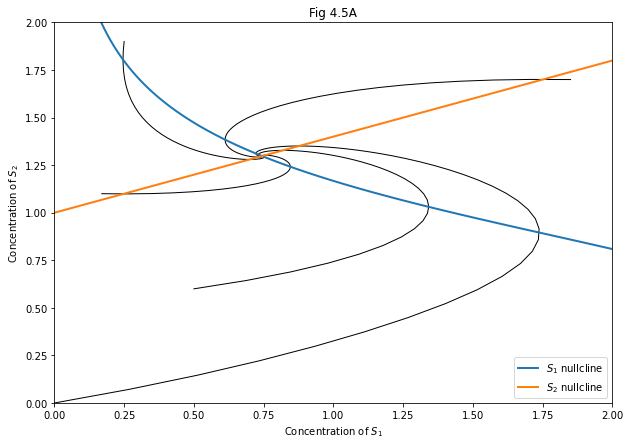

In [24]:
# Figure 4.5A (nullclines)
plt.figure(figsize=(10, 7))
plt.axis([0, 2, 0, 2])
plt.title("Fig 4.5A")
plt.xlabel('Concentration of $S_1$')
plt.ylabel('Concentration of $S_2$')
for sol in sols:
    plt.plot(sol[:, 0], sol[:, 1], 'k', linewidth=1)
# nullclines (ds/dt = 0)
ns12 = np.linspace(0, 2, 100)
ns11 = k1 / ((k3 + k5) * (1 + ns12**n))
ns21 = np.linspace(0, 2, 100)
ns22 = (k2 + k5 * ns21) / k4
plt.plot(ns11, ns12, label='$S_1$ nullcline', linewidth=2)
plt.plot(ns21, ns22, label='$S_2$ nullcline', linewidth=2)
plt.legend(loc='best')

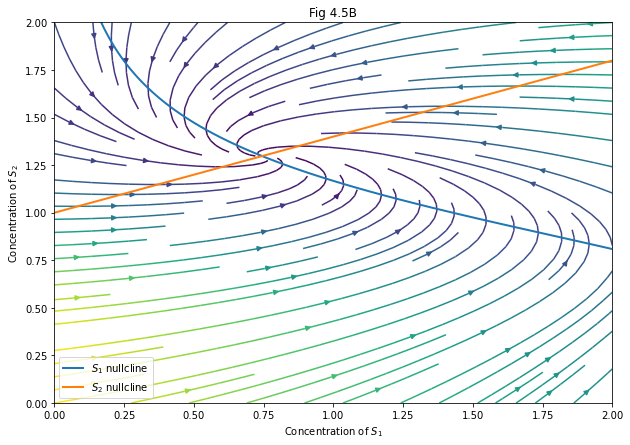

In [25]:
# Figure 4.5B
plt.figure(figsize=(10, 7))
plt.axis([0, 2, 0, 2])
plt.title("Fig 4.5B")
plt.xlabel('Concentration of $S_1$')
plt.ylabel('Concentration of $S_2$')
plt.streamplot(xx, yy, xdot, ydot, color=np.hypot(xdot, ydot))
plt.plot(ns11, ns12, label='$S_1$ nullcline', linewidth=2)
plt.plot(ns21, ns22, label='$S_2$ nullcline', linewidth=2)
plt.legend(loc='best')

Text(0, 0.5, 'Steady state $S_1$ concentration')

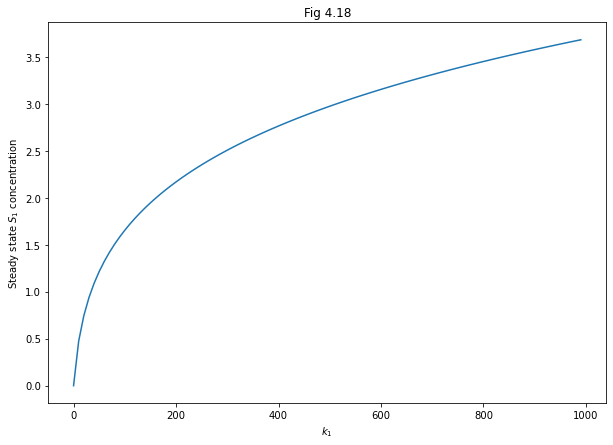

In [26]:
# Figure 4.18
# Find steady states for different values of k_1
k1s = range(0, 1000, 10)
s1s = [odeint(rhs, [0, 0], np.linspace(0, 200), args=(k1, *p[1:]))[-1, 0] for k1 in k1s]

plt.figure(figsize=(10, 7))
plt.title("Fig 4.18")
plt.plot(k1s, s1s)
plt.xlabel('$k_1$')
plt.ylabel('Steady state $S_1$ concentration')

# Fig 4.7, 4.8, 4.9, and 4.19A

symmetric network

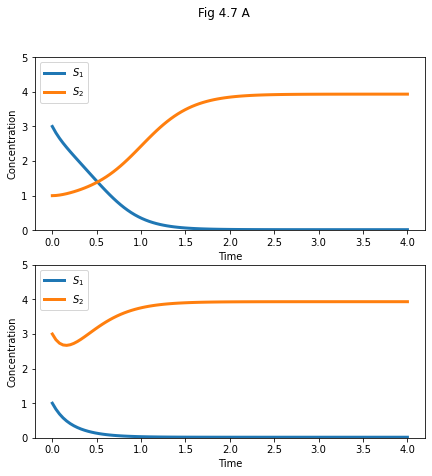

In [27]:
"""
Model of symmetric network from Figure 4.6. This code generates Figures
4.7, 4.8, 4.9, and 4.19A
"""
def model(y, t, k1, k2, k3, k4, n1, n2):
    """
    dynamics for symmetric network model
    """
    s1, s2 = y
    dS1 = k1 * _hillr(s2, 1, n2) - k3 * s1
    dS2 = k2 * _hillr(s1, 1, n1) - k4 * s2
    return [dS1, dS2]

def s1_nullcline(ns12, k1, k2, k3, k4, n1, n2):
    return k1 / k3 * _hillr(ns12, 1, n2)

def s2_nullcline(ns21, k1, k2, k3, k4, n1, n2):
    return k2 / k4 * _hillr(ns21, 1, n1)


ts = _ts(4.0)
p = k1, k2, k3, k4, n1, n2 = 20, 20, 5, 5, 1, 4

# Fig 4.7A: imbalanced inhibition strength
y0s = ([3, 1], [1, 3])
sols = [odeint(model, y0, ts, args=p) for y0 in y0s]

fig, ax = plt.subplots(2, 1, figsize=(7, 7))
plt.suptitle("Fig 4.7 A")

for axi, sol in zip(ax, sols):
    axi.plot(ts, sol, lw=3)
    axi.set_ylim((0, 5))
    axi.set_xlabel("Time")
    axi.set_ylabel("Concentration")
    axi.legend(("$S_1$", "$S_2$"), loc='best')

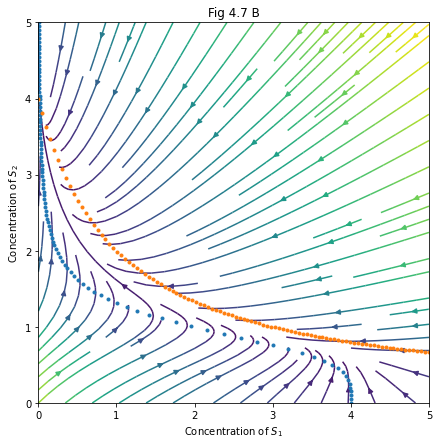

In [28]:
# Fig 4.7B: phase portrait (stream plot)
plt.figure(figsize=(7, 7))
plt.title("Fig 4.7 B")
plt.xlabel('Concentration of $S_1$')
plt.ylabel('Concentration of $S_2$')
plt.axis([0, 5, 0, 5])

yy, xx = np.ogrid[0:5:50j, 0:5:50j]
xdot, ydot = model([xx, yy], 0, *p)
plt.streamplot(xx, yy, xdot, ydot, color=np.hypot(xdot, ydot))

# Nullclines
ns12 = np.linspace(0, 5, 100)
ns11 = s1_nullcline(ns12, *p)
ns21 = np.linspace(0, 5, 100)
ns22 = s2_nullcline(ns21, *p)
plt.plot(ns11, ns12, '.')
plt.plot(ns21, ns22, '.')

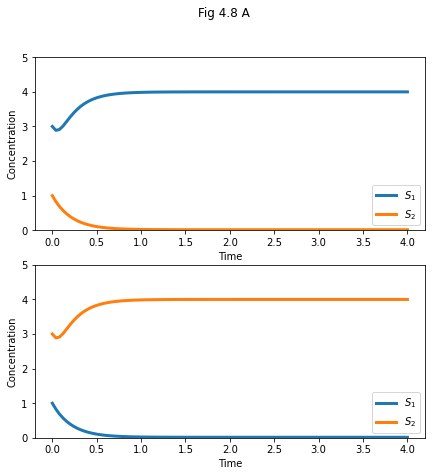

In [29]:
# Fig 4.8A: Symmetric parameters
p = k1, k2, k3, k4, n1, n2 = 20, 20, 5, 5, 4, 4

sols = [odeint(model, y0, ts, args=p) for y0 in y0s]
fig, ax = plt.subplots(2, 1, figsize=(7, 7))

plt.suptitle("Fig 4.8 A")
for axi, sol in zip(ax, sols):
    axi.plot(ts, sol, lw=3)
    axi.set_ylim((0, 5))
    axi.set_ylim((0, 5))
    axi.set_xlabel("Time")
    axi.set_ylabel("Concentration")
    axi.legend(("$S_1$", "$S_2$"), loc='best')

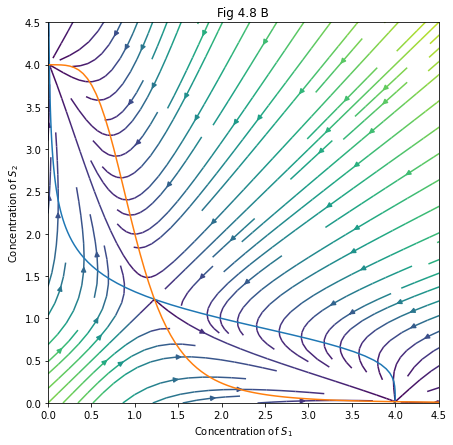

In [30]:
# Fig. 4.8B
xdot, ydot = model([xx, yy], 0, *p)
ns11 = s1_nullcline(ns12, *p)
ns22 = s2_nullcline(ns21, *p)
plt.figure(figsize=(7, 7))
plt.title("Fig 4.8 B")
plt.xlabel('Concentration of $S_1$')
plt.ylabel('Concentration of $S_2$')
plt.axis([0, 4.5, 0, 4.5])
plt.streamplot(xx, yy, xdot, ydot, color=np.hypot(xdot, ydot))
plt.plot(ns11, ns12, ns21, ns22)

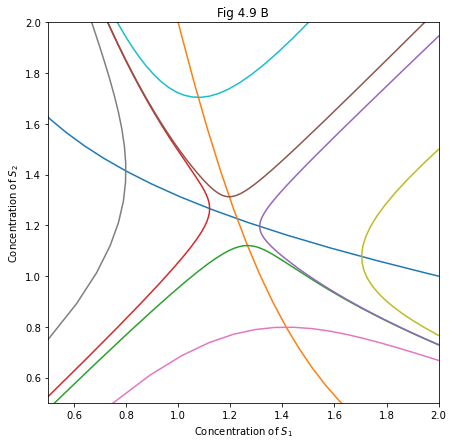

In [31]:
# Fig. 4.9
plt.figure(figsize=(7, 7))
plt.title("Fig 4.9 B")
plt.xlabel('Concentration of $S_1$')
plt.ylabel('Concentration of $S_2$')
plt.axis([0.5, 2, 0.5, 2])
y0s = ([0.525, 0.5], [0.5, 0.525], [4, 3.9], [3.9, 4],
       [0.75, 0.5], [0.5, 0.75], [2, 1.5], [1.5, 2])
sols = [odeint(model, y0, np.linspace(0.0, 4.0, 400), args=p) for y0 in y0s]

plt.plot(ns11, ns12, ns21, ns22)

for sol in sols:
    plt.plot(sol[:, 0], sol[:, 1])
plt.show()

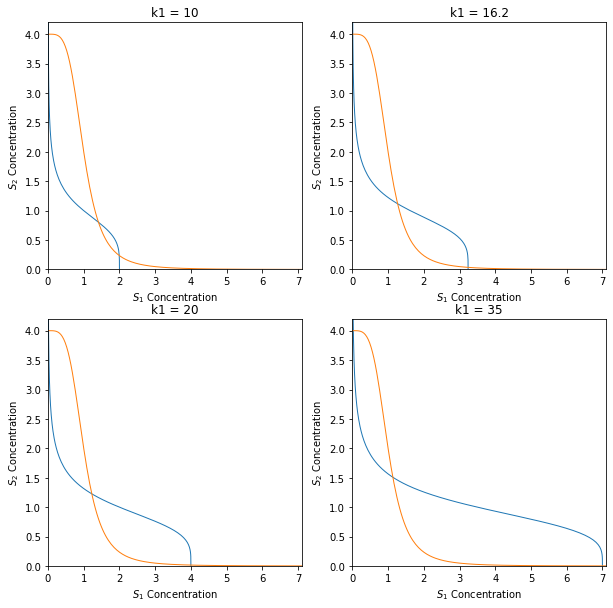

In [32]:
# Fig 4.19A
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

k1s = (10, 16.2, 20, 35)

for k1, axi in zip(k1s, np.ravel(ax)):
    axi.set_title(f'k1 = {k1}')
    ns12, ns21 = np.linspace(0, 8, 200), np.linspace(0, 8, 200)
    ns11 = s1_nullcline(ns12, k1, *p[1:])
    ns22 = s2_nullcline(ns21, k1, *p[1:])
    axi.plot(ns11, ns12, lw=1, label='$S_1$ nullcline')
    axi.plot(ns21, ns22, lw=1, label='$S_2$ nullcline')
    axi.set_xlim((0, 7.1))
    axi.set_ylim((0, 4.2))
    axi.set_xlabel('$S_1$ Concentration')
    axi.set_ylabel('$S_2$ Concentration')

plt.show()

# Fig 4.11

potential surfaces

<ipython-input-33-4be462212963>:16: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


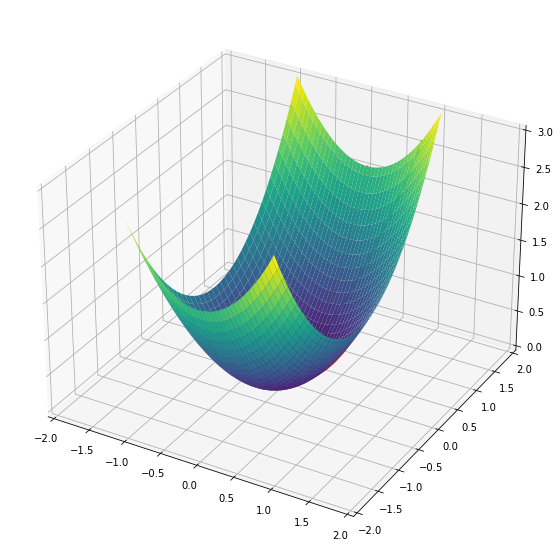

In [33]:
"""
plot potential surfaces in Figure 4.11.  
The plots can be rotated to match the figure.
"""
from mpl_toolkits.mplot3d import Axes3D

def get_z1(x, y):
    return x **2 + 0.5 * y ** 2

def get_z2(x, y):
    return (0.2 * x ** 2 - 1) ** 2 + y **2

# plot surface
xx, yy = np.mgrid[-1:1:80j, -2:2:80j]
fig = plt.figure(1, figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, get_z1(xx, yy), cmap=plt.cm.viridis, linewidth=0.5)
ax.axis([-2, 2, -2, 2])
# plot (approximate) trajectories
x1 = np.zeros(10)
y1 = np.linspace(0, 2, 10)
x2 = np.linspace(0, 0.75, 50)
y2 = 2.3 * np.sqrt(x2)
x3 = np.linspace(0, 1, 10)
y3 = np.zeros(10)
for x, y in zip((x1, x2, x3), (y1, y2, y3)):
    ax.plot(x, y, get_z1(x,y), linewidth=2)
plt.show()

<ipython-input-34-263504ed3e57>:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


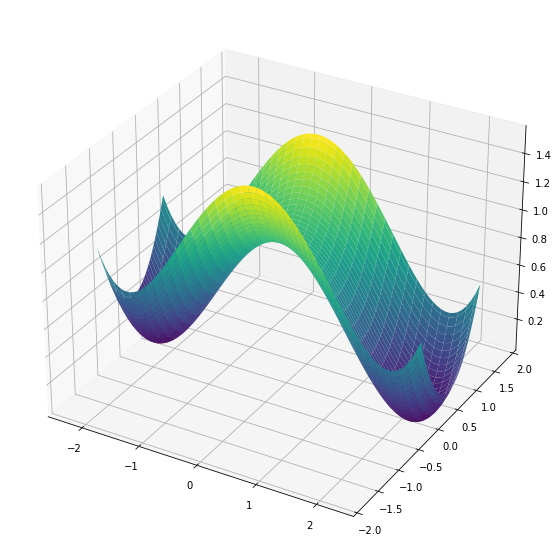

In [34]:
# double-well potential
xx, yy = np.meshgrid(np.linspace(-2.75, 2.75, 80), np.linspace(-0.75, 0.75, 80))
fig = plt.figure(2, figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.axis([-2.5, 2.5, -2, 2])
ax.plot_surface(xx, yy, get_z2(xx, yy), cmap=plt.cm.viridis, linewidth=0.5)

In [35]:
# plot (approximate) trajectories
x1 = np.zeros(10)
y1 = np.linspace(0, 0.75, 10)
x2 = np.linspace(-0.14, -2.2, 50)
y2 = 0.01 * (x2 + 2.2) ** 6
x3 = np.linspace(-1.14, -2.2, 50)
y3 = 0.62 * (x3 + 2.2) ** 3
x4 = np.linspace(0.14, 2.2, 50)
y4 = 0.01 * (x4 - 2.2) ** 6
x5 = np.linspace(1.14, 2.2, 50)
y5 = -0.62 * (x5 - 2.2) ** 3
for x, y in zip((x1, x2, x3, x4, x5), (y1, y2, y3, y4, y5)):
    ax.plot(x, y, get_z2(x,y), linewidth=2)
    
plt.show()

# Figure 4.13

<ipython-input-36-d374f4076e8b>:20: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


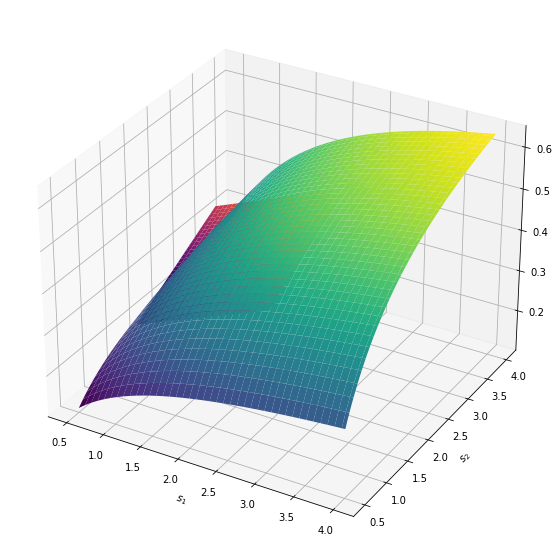

In [36]:
"""
plot the surface and tangent plane in Figure 4.13.  
"""
from mpl_toolkits.mplot3d import Axes3D

def get_z(x, y):
    return x * y / ((1 + x) * (1 + y))
def get_tangent_plane(x, y):
    return 4/9 + (6/81)*(x-2) + (6/81)*(y-2)

s = np.linspace(0.5, 4, 80)
s1, s2 = np.meshgrid(s, s)
z = get_z(s1, s2)
ss = np.linspace(1, 2.75, 30)
ss1, ss2 = np.meshgrid(ss, ss)
tan = get_tangent_plane(ss1, ss2)

# generate plot
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.set_xlabel('$s_1$')
ax.set_ylabel('$s_2$')
ax.plot_surface(s1, s2, z, cmap=plt.cm.viridis, linewidth=0.5)
ax.plot_surface(ss1, ss2, tan, cmap=plt.cm.inferno, linewidth=0.5)
plt.show(fig)

# Figure 4.15, 4.16, and 4.17

Oscillatory network

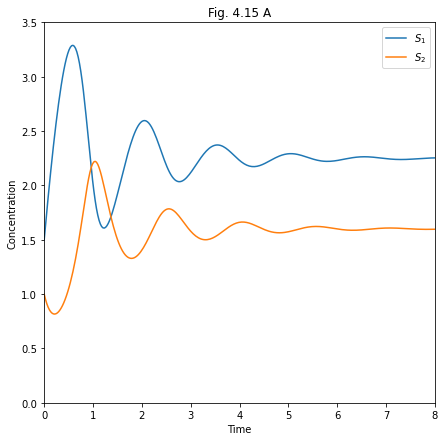

In [37]:
"""
Model of oscillatory network from Figure 4.14. This code generates Figures
4.15, 4.16, and 4.17
"""
def model(y, t, k0, k1, k2, n):
    """
    Dynamics for oscillatory network
    """
    s1, s2 = y
    v0 = k0
    v1 = k1 * s1 * (1 + s2 ** n)
    v2 = k2 * s2
    return [v0 - v1, v1 - v2]

def s1_nullcline(ns12, k0, k1, k2, n):
    return k0 / (k1 * (1 + ns12 ** n))

def s2_nullcline(ns22, k0, k1, k2, n):
    return k2 * ns22 / (k1 * (1 + ns22 ** n))

ts = _ts(8.0, num=300)

# Damped oscillator
p = k0, k1, k2, n = 8, 1, 5, 2

y0s = [[1.5, 1], [0, 1], [0, 3], [2, 0]]
sols = [odeint(model, y0, ts, args=p) for y0 in y0s]

# Fig 4.15 A
plt.figure(figsize=(7, 7))
plt.title('Fig. 4.15 A')
plt.plot(ts, sols[0])
plt.axis([ts[0], ts[-1], 0, 3.5])
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend(('$S_1$', '$S_2$'), loc='best')
plt.show()

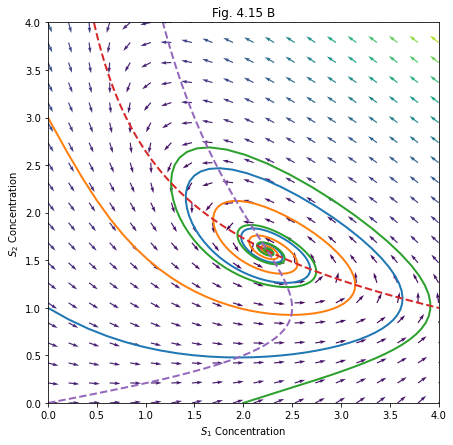

In [38]:
# Fig. 4.15 B
plt.figure(figsize=(7, 7))
for sol in sols[1:]:
    plt.plot(sol[:, 0], sol[:, 1], lw=2)

yy, xx = np.ogrid[0:4:20j, 0:4:20j]
xdot, ydot = model([xx, yy], 0, *p)
vec_len = np.hypot(xdot, ydot)
plt.quiver(xx, yy, xdot/vec_len, ydot/vec_len, vec_len)
ns12, ns22 = np.linspace(0, 4, 100), np.linspace(0, 4, 100)
ns11, ns21 = s1_nullcline(ns12, *p), s2_nullcline(ns22, *p)
plt.plot(ns11, ns12, '--', lw=2)
plt.plot(ns21, ns22, '--', lw=2)
plt.axis([0, 4, 0, 4])
plt.xlabel('$S_1$ Concentration')
plt.ylabel('$S_2$ Concentration')
plt.title('Fig. 4.15 B')
plt.show()

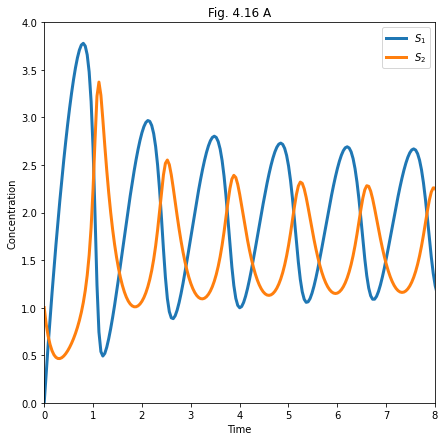

In [39]:
# Sustained (limit cycle) oscillations
p = k0, k1, k2, n = 8, 1, 5, 2.5
ts = _ts(40.0, num=1000)

y0s = [[0, 1], [0, 3], [2, 0]]
sols = [odeint(model, y0, ts, args=p) for y0 in y0s]

# figure 4.16A
plt.figure(figsize=(7, 7))
plt.title('Fig. 4.16 A')
plt.plot(ts, sols[0], lw=3)
plt.axis([0, 8, 0, 4])
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend(('$S_1$', '$S_2$'), loc='best')
plt.show()

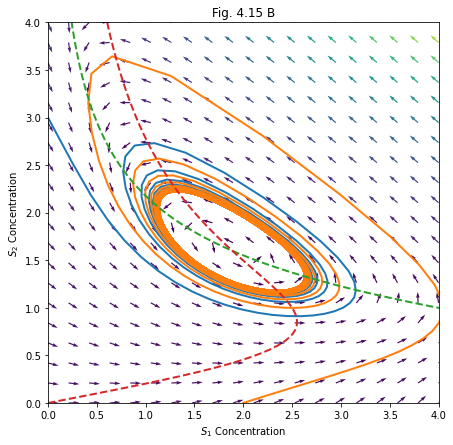

In [40]:
# Phase plot of limit cycle
plt.figure(figsize=(7, 7))
for sol in sols[1:]:
    plt.plot(sol[:, 0], sol[:, 1], lw=2)

yy, xx = np.ogrid[0:4:20j, 0:4:20j]
xdot, ydot = model([xx, yy], 0, *p)
vec_len = np.hypot(xdot, ydot)
plt.quiver(xx, yy, xdot/vec_len, ydot/vec_len, vec_len)
ns12, ns22 = np.linspace(0, 4, 100), np.linspace(0, 4, 100)
ns11, ns21 = s1_nullcline(ns12, *p), s2_nullcline(ns22, *p)
plt.plot(ns11, ns12, '--', lw=2)
plt.plot(ns21, ns22, '--', lw=2)
plt.axis([0, 4, 0, 4])
plt.xlabel('$S_1$ Concentration')
plt.ylabel('$S_2$ Concentration')
plt.title('Fig. 4.15 B')
plt.show()

# Fig 4.22


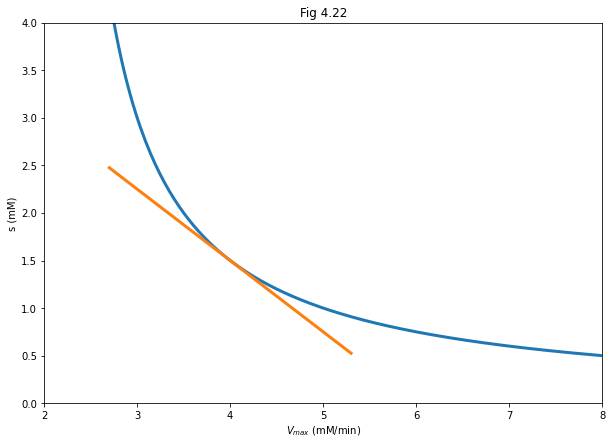

In [41]:
"""
generate figure 4.22
"""
# curve
v = np.linspace(2.2, 10, 300)
s = 3 / (v - 2)

# tangent line
v2 = np.linspace(2.7, 5.3)
s2 = 1.5 - (v2 - 4) * 0.75

plt.figure(figsize=(10, 7))
plt.title('Fig 4.22')
plt.plot(v, s, lw=3)
plt.plot(v2, s2, lw=3)
plt.axis([2, 8, 0, 4])
plt.xlabel('$V_{max}$ (mM/min)')
plt.ylabel('s (mM)')
plt.show()